## Жозеф Веншенесс  23.М08-мм

* Изучите возможности sklearn для решения задач Multiclass classification, Multilabel classification и Multioutput Regression. Основные компоненты библиотеки указаны на рисунке ниже. __выполнено__
* Найдите данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи. __выполнено__

* Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи. __выполнено__

* При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering). __выполнено__

* Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания. __выполнено__

* Замерить время обучения каждой модели для каждой стратегии. __выполнено__

* Для оценки качества моделей используйте метрику AUC-ROC. __выполнено__

* Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы. __выполнено__

Этот набор данных содержит 2126 записей, извлеченных из исследований кардиотокограммы, которые затем были классифицированы тремя экспертами-акушерами на 3 класса:

* Нормальный
* Подозреваемый
* Патологический

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('fetal_health.csv')
df.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.000,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
5,134.0,0.001,0.0,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,50.0,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0
6,134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,...,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0,3.0
7,122.0,0.000,0.0,0.000,0.000,0.0,0.000,83.0,0.5,6.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
8,122.0,0.000,0.0,0.002,0.000,0.0,0.000,84.0,0.5,5.0,...,62.0,130.0,0.0,0.0,122.0,122.0,123.0,3.0,1.0,3.0
9,122.0,0.000,0.0,0.003,0.000,0.0,0.000,86.0,0.3,6.0,...,62.0,130.0,1.0,0.0,122.0,122.0,123.0,1.0,1.0,3.0


In [104]:
df.fetal_health.unique()

array([2., 1., 3.])

In [105]:
df.shape

(2126, 22)

Проверяем тип данных

In [106]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Основные статистики нашего датасета

In [107]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Проверяем наличие пропусков

In [108]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Целевой признак fetal_health

In [109]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

постмотрим отношение fetal_health и признак acceleration

<AxesSubplot:xlabel='fetal_health', ylabel='accelerations'>

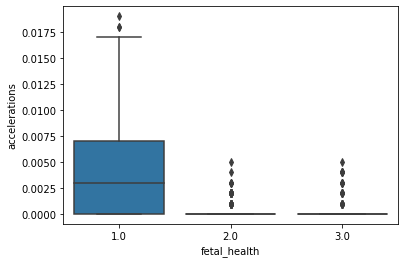

In [110]:
sns.boxplot(data=df, x="fetal_health", y="accelerations")

<AxesSubplot:xlabel='fetal_health', ylabel='baseline value'>

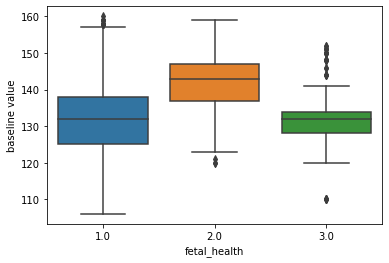

In [111]:
sns.boxplot(data=df, x="fetal_health", y="baseline value")

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

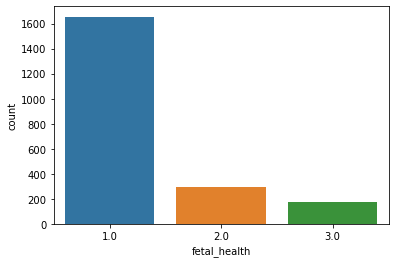

In [112]:
sns.countplot('fetal_health', data=df)

Посмотрим отношение fetal_health со всеми остальними признаками с помощью boxplot

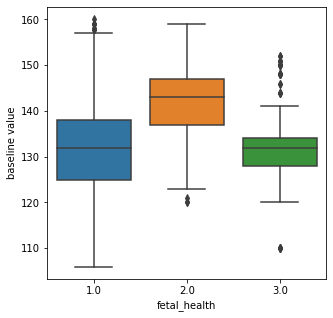

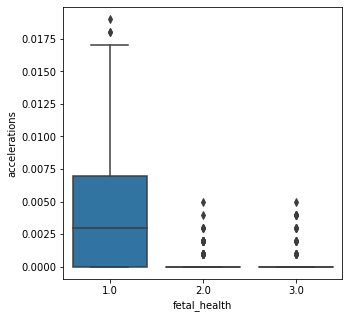

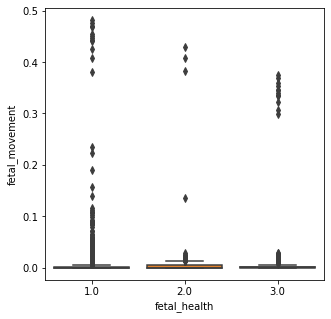

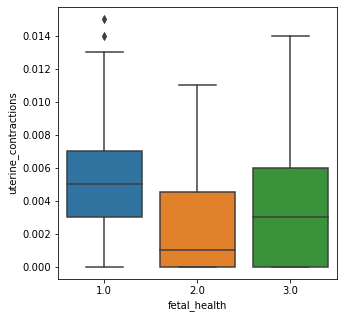

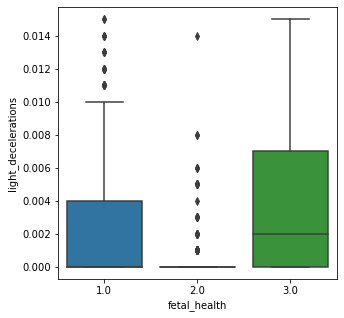

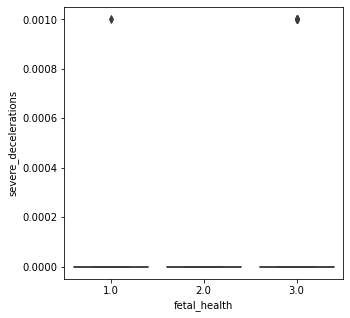

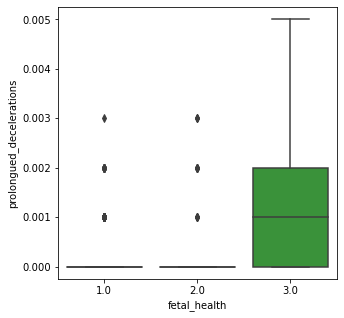

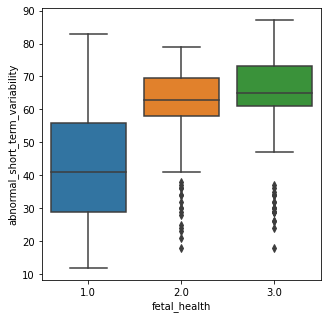

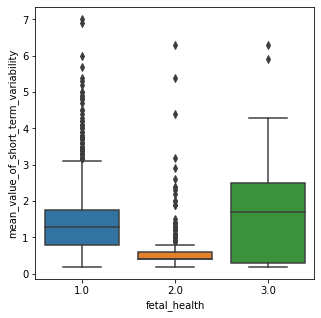

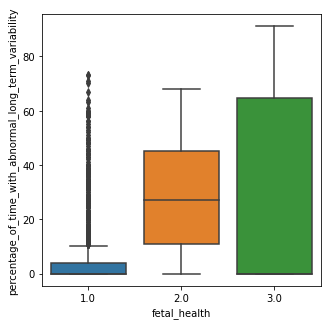

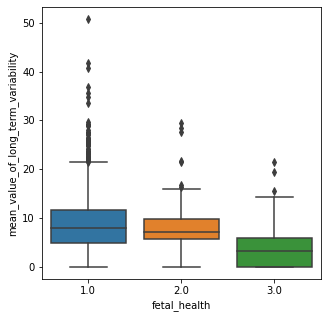

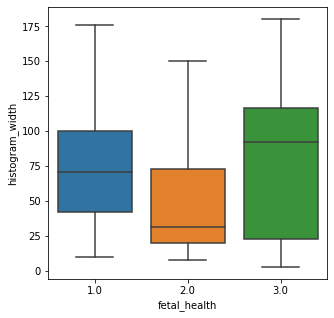

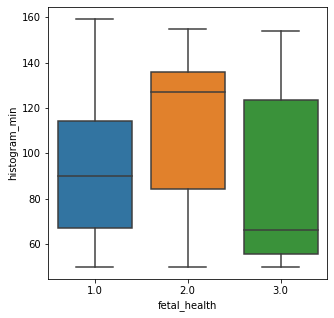

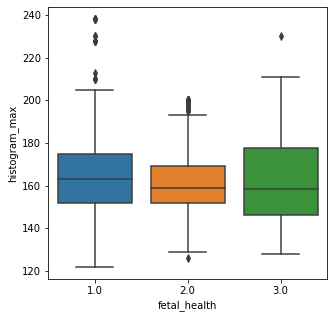

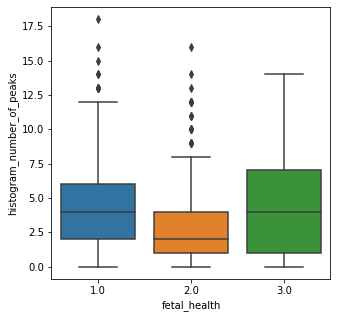

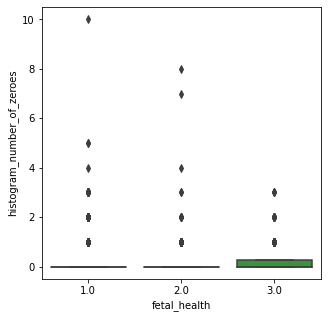

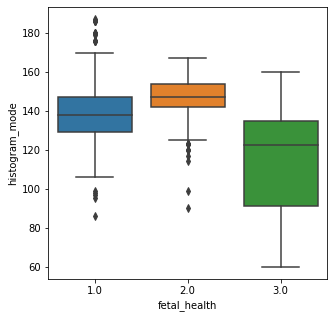

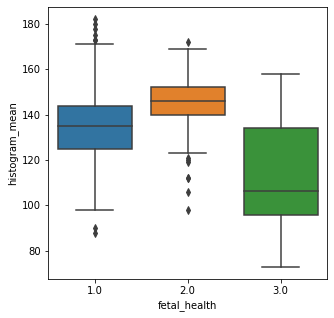

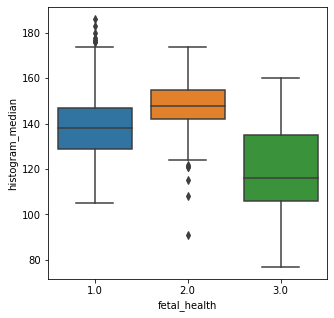

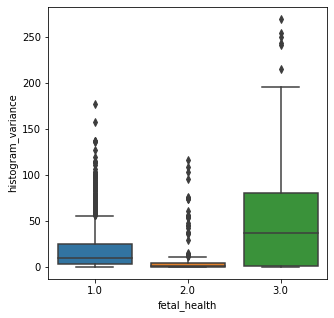

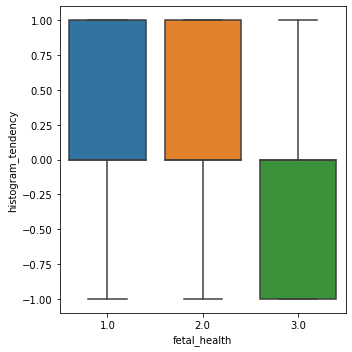

In [113]:
for i in df.columns:
    if i != "fetal_health":
        fig=plt.subplots(figsize=(5,5))
        sns.boxplot(data=df, x="fetal_health", y=i)
plt.tight_layout()

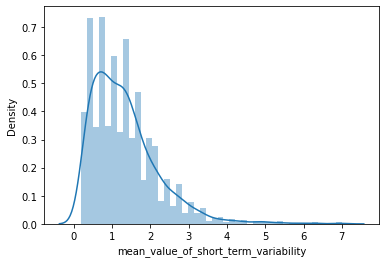

In [114]:
sns.distplot(df['mean_value_of_short_term_variability']);

array([[<AxesSubplot:title={'center':'histogram_number_of_peaks'}>]],
      dtype=object)

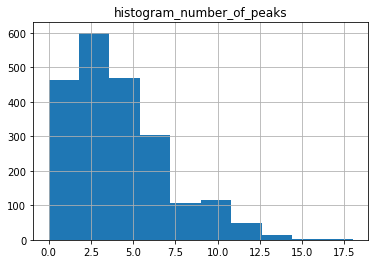

In [115]:
df.hist(column=['histogram_number_of_peaks'])

array([[<AxesSubplot:title={'center':'fetal_movement'}>]], dtype=object)

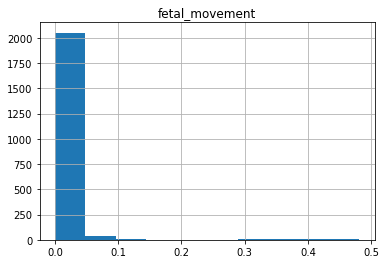

In [116]:
df.hist(column=['fetal_movement'])

построим таблицу корреляции

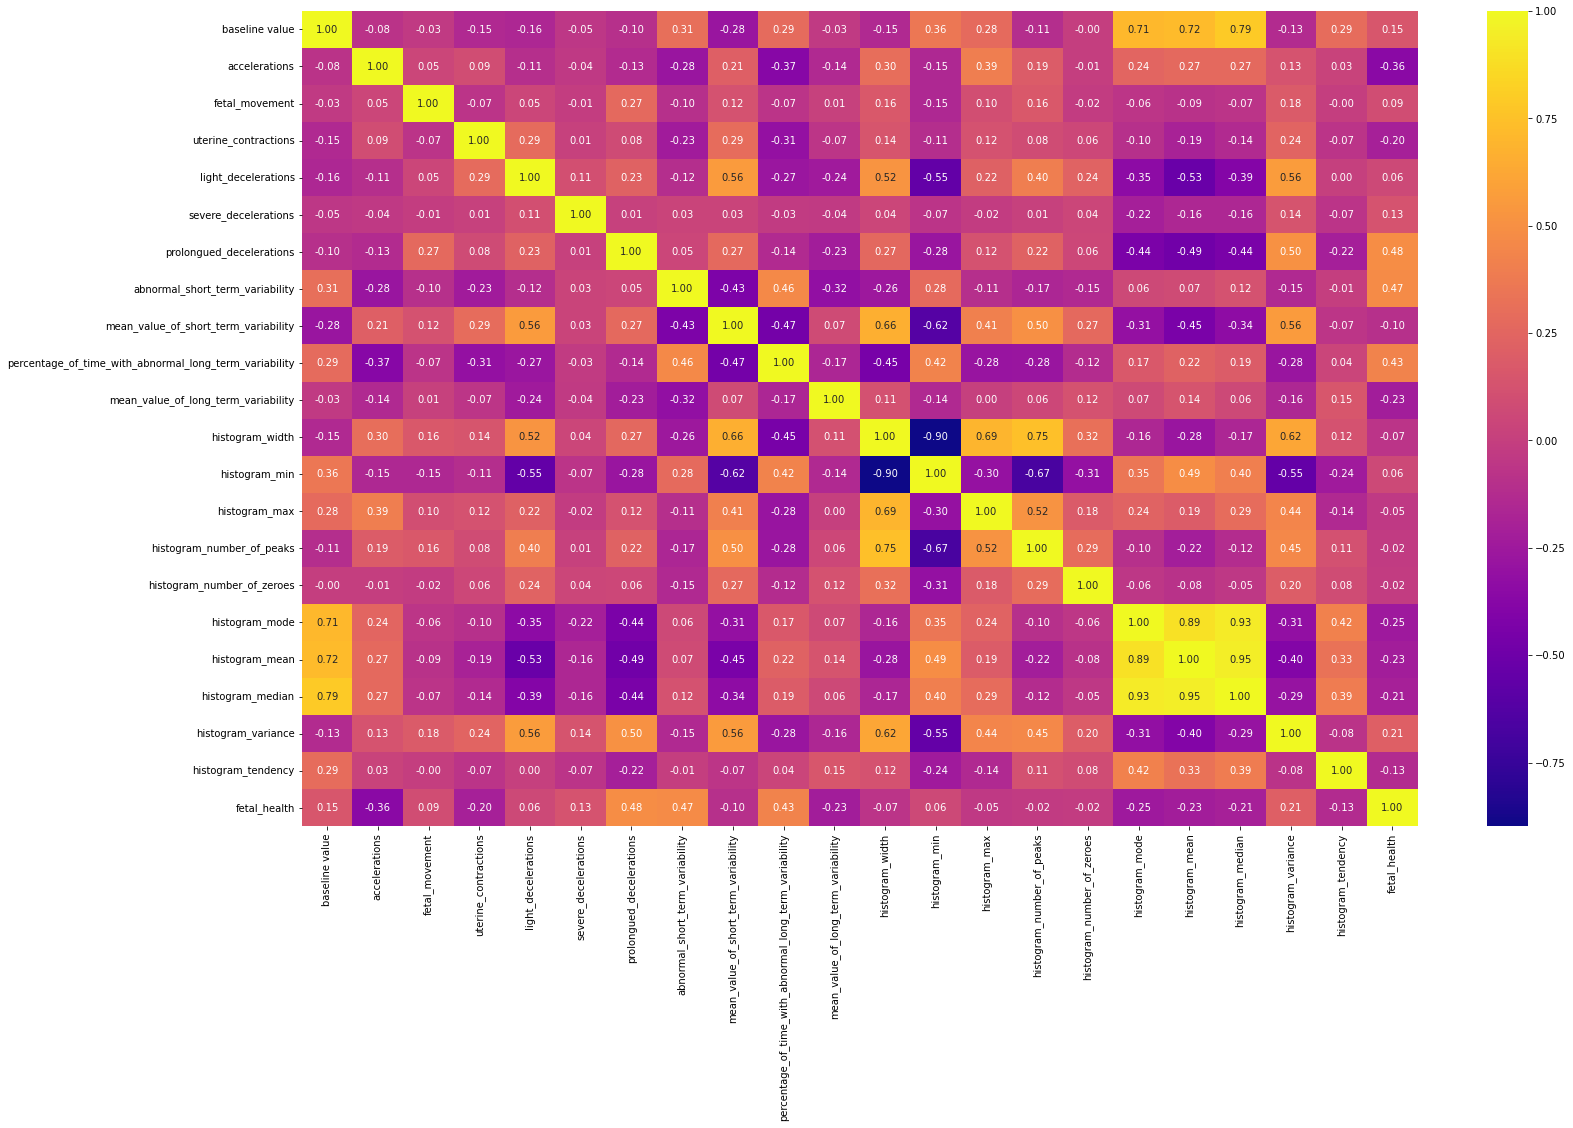

In [117]:
sns.heatmap(df.corr(), annot=True,xticklabels=True, yticklabels=True, cmap='plasma', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.show()

In [118]:
df=df.drop(columns=["histogram_mean","histogram_median", "histogram_width"])


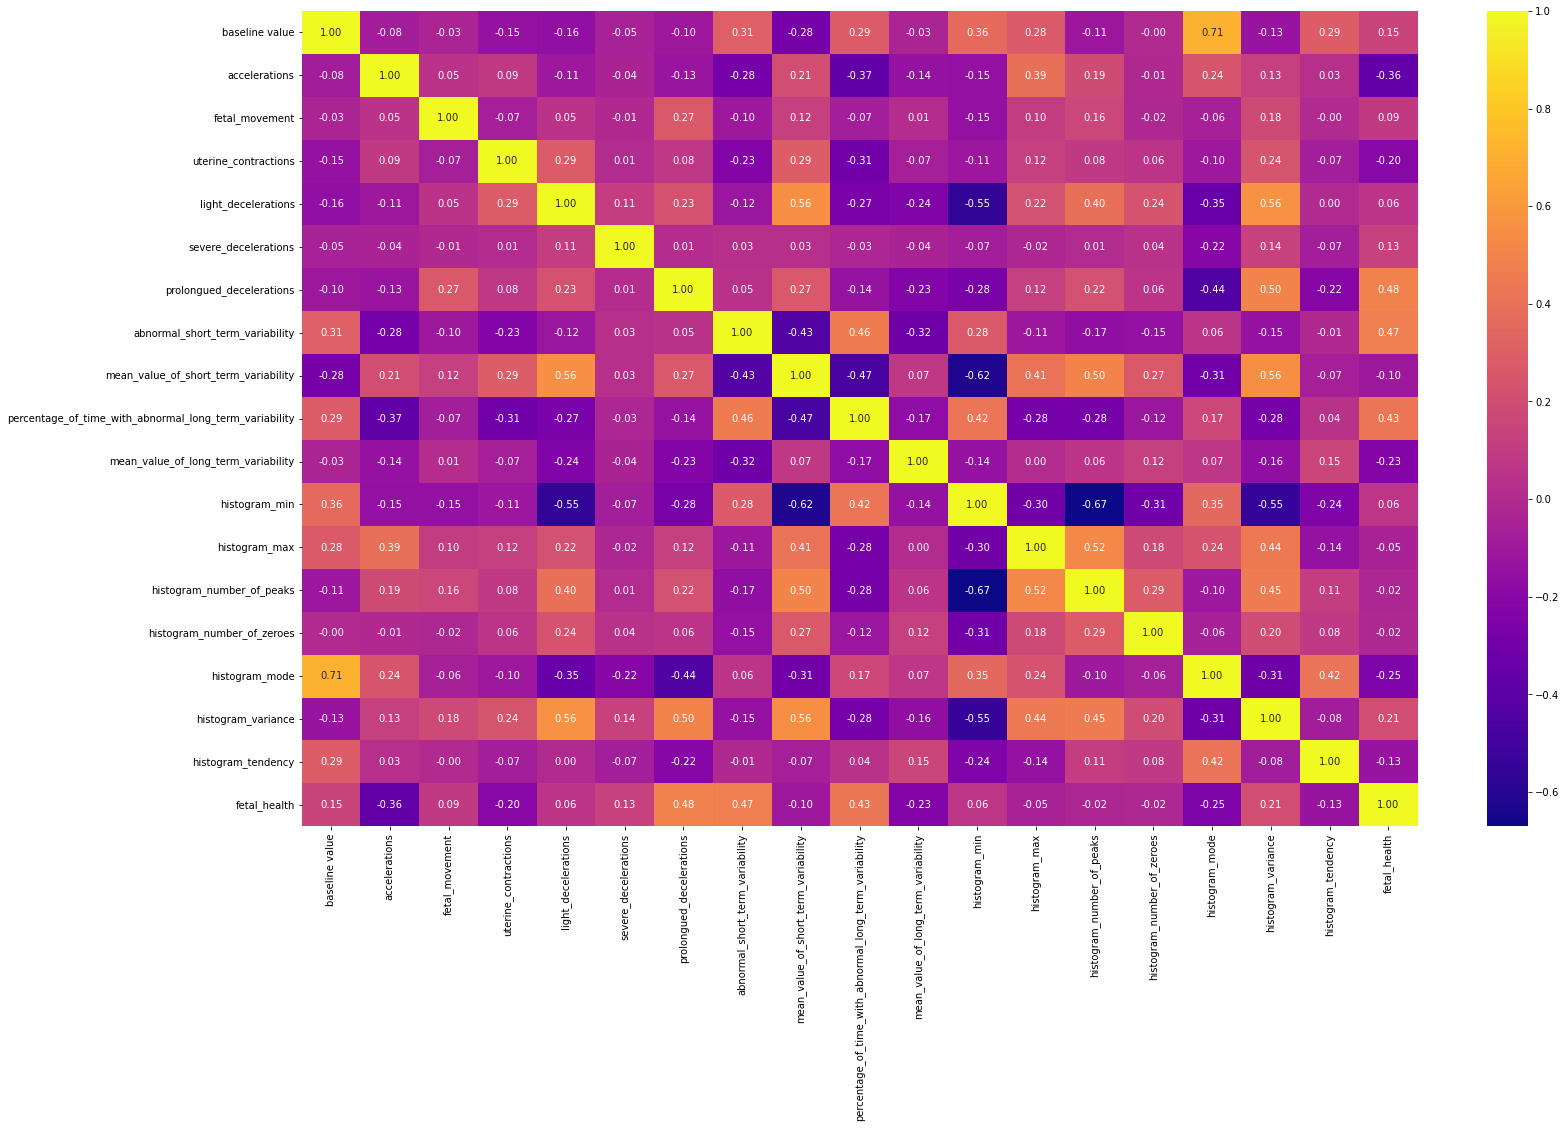

In [119]:
sns.heatmap(df.corr(), annot=True,xticklabels=True, yticklabels=True, cmap='plasma', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(25, 15)
plt.show()

In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import time


In [121]:
y = df['fetal_health']
X = df.drop(columns=['fetal_health'])

y = label_binarize(y, classes=[1,2,3])

n_classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [122]:

classifiers ={'logisticRegression':{
    'model': LogisticRegression(),
    'param_grid': {
        'estimator__C': [0.1, 1, 10, 100],
        'estimator__penalty':['l1','l2'],
        'estimator__solver': ['liblinear', 'lbfgs']
        }
    },
    'DecisionTree':{
        'model': DecisionTreeClassifier(),
        'param_grid': {
            'estimator__max_depth': [3, 5, 7, 9],
            'estimator__min_samples_split': [2, 4, 6]
        }
    },
    'K-nearest neighbor':{
        'model': KNeighborsClassifier(),
        'param_grid': {
            "estimator__n_neighbors": range(1, 11, 1), 
            "estimator__weights": ['uniform', 'distance']
        }
    },
    'NaiveBayes':{
        'model': GaussianNB(),
        'param_grid':{}
    },
    'SVM':{
        'model': SVC(),
        'param_grid':{
            'estimator__C': [0.1, 1, 10, 100, 1000],  
            'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'estimator__kernel': ['rbf'] 
        }
    }
}






In [123]:
# Перебор базовых классификаторов и стратегий для обучения и замера времени обучения
for clf_name, clf in classifiers.items():
    if clf_name != 'SVM':
        model = OneVsRestClassifier(clf['model'])
        start_time = time.time()
        nb_best = GridSearchCV(estimator= model, param_grid=clf['param_grid'], scoring="roc_auc", cv=5)
        nb_best.fit(X_train_scaled, y_train)
        end_time = time.time()  # Засекаем время окончания обучения модели
        best_est = nb_best.best_estimator_
        y_prob = nb_best.predict_proba(X_test_scaled)
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        print(roc_auc)
        best_param = nb_best.best_params_
        print(f"Best parameter for {clf_name}: {nb_best.best_params_}")    
        training_time = end_time - start_time  # Вычисляем время обучения
        print(f"OneVsRestClassifier with {clf_name}: Training Time = {training_time:.4f} seconds, AUC-ROC = {roc_auc}")
        print("")


{0: 0.9575477055883689, 1: 0.9293655622545495, 2: 0.9860685541528783}
Best parameter for logisticRegression: {'estimator__C': 1, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}
OneVsRestClassifier with logisticRegression: Training Time = 2.7178 seconds, AUC-ROC = {0: 0.9575477055883689, 1: 0.9293655622545495, 2: 0.9860685541528783}

{0: 0.9028992503407542, 1: 0.9281486807898668, 2: 0.9733218940229603}
Best parameter for DecisionTree: {'estimator__max_depth': 5, 'estimator__min_samples_split': 4}
OneVsRestClassifier with DecisionTree: Training Time = 1.1704 seconds, AUC-ROC = {0: 0.9028992503407542, 1: 0.9281486807898668, 2: 0.9733218940229603}

{0: 0.9713837460245344, 1: 0.9476095654258163, 2: 0.9796543694080158}
Best parameter for K-nearest neighbor: {'estimator__n_neighbors': 10, 'estimator__weights': 'distance'}
OneVsRestClassifier with K-nearest neighbor: Training Time = 4.6440 seconds, AUC-ROC = {0: 0.9713837460245344, 1: 0.9476095654258163, 2: 0.9796543694080158}

{

In [124]:
params = { 
     'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
     'estimator__kernel': ['rbf','poly']       
}
start_time = time.time()
clf = OneVsRestClassifier(SVC())
nb_best = GridSearchCV(estimator= clf, param_grid=params, scoring="roc_auc", cv=5)
y_score = nb_best.fit(X_train_scaled, y_train).decision_function(X_test_scaled)
end_time = time.time()
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
training_time = end_time - start_time  # Вычисляем время обучения
print(f"OneVsRestClassifier with SVM: Training Time = {training_time:.4f} seconds, AUC-ROC = {roc_auc}")

OneVsRestClassifier with SVM: Training Time = 7.3542 seconds, AUC-ROC = {0: 0.9255168105406633, 1: 0.8982797721112894, 2: 0.9700126649507701}


OnevsRest classifier:
лучше по времени: Naives bayes - 0.0882 seconds
лучший результат: K-nearest neighbor: mean=0,96

OneVsOne Classifier

In [125]:
y = df['fetal_health']
X = df.drop(columns=['fetal_health'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [126]:
def decision_scores_to_probabilities(decision_scores):
    exp_scores = np.exp(decision_scores)
    return exp_scores / exp_scores.sum(axis=1, keepdims=True)

for clf_name, clf in classifiers.items():
    start_time = time.time()
    model = OneVsOneClassifier(clf['model'])
    nb_best = GridSearchCV(estimator= model, param_grid=clf['param_grid'], scoring="roc_auc", cv=5)
    nb_best.fit(X_train_scaled, y_train)
    end_time = time.time()  # Засекаем время окончания обучения модели
    y_score = nb_best.decision_function(X_test_scaled)
    best_est = nb_best.best_estimator_
    # Convert decision scores to probabilities
    y_prob = decision_scores_to_probabilities(y_score)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    roc_auc = roc_auc_score(y_test, y_prob,  multi_class='ovo')
    print(f"Best parameter for {clf_name}: {nb_best.best_params_}")
    #print(f"AUC-ROC for {clf_name}: {auc_roc}")    
    training_time = end_time - start_time  # Вычисляем время обучения
    print(f"OneVsOneClassifier with {clf_name}: Training Time = {training_time:.4f} seconds, AUC-ROC = {roc_auc}")
    print("")


Best parameter for logisticRegression: {'estimator__C': 0.1, 'estimator__penalty': 'l1', 'estimator__solver': 'liblinear'}
OneVsOneClassifier with logisticRegression: Training Time = 5.1718 seconds, AUC-ROC = 0.933273480770579

Best parameter for DecisionTree: {'estimator__max_depth': 3, 'estimator__min_samples_split': 2}
OneVsOneClassifier with DecisionTree: Training Time = 0.9686 seconds, AUC-ROC = 0.9498820800648121

Best parameter for K-nearest neighbor: {'estimator__n_neighbors': 1, 'estimator__weights': 'uniform'}
OneVsOneClassifier with K-nearest neighbor: Training Time = 0.3905 seconds, AUC-ROC = 0.9084125957835751

Best parameter for NaiveBayes: {}
OneVsOneClassifier with NaiveBayes: Training Time = 0.0451 seconds, AUC-ROC = 0.8857689171749591

Best parameter for SVM: {'estimator__C': 0.1, 'estimator__gamma': 1, 'estimator__kernel': 'rbf'}
OneVsOneClassifier with SVM: Training Time = 8.9979 seconds, AUC-ROC = 0.8371804996195921



OnevsOne classifier:
лучше по времени: Naives bayes - 0.0451 seconds
лучший результат: Decision tree classifier = 0.94

In [127]:
for clf_name, clf in classifiers.items():
    model = OutputCodeClassifier(clf['model'])
    start_time = time.time()
    nb_best = GridSearchCV(estimator= model, param_grid=clf['param_grid'], scoring="roc_auc", cv=5)
    nb_best.fit(X_train_scaled, y_train)
    end_time = time.time()  # Засекаем время окончания обучения модели
    best_est = nb_best.best_estimator_
    y_score = nb_best.predict(X_test_scaled)
    _y_test = label_binarize(y_test.copy(), classes=[1,2,3])
    _y_score = label_binarize(y_score.copy(),classes=[1,2,3])
    #auc_roc(y_test, y_score, clas)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(_y_test[:, i], _y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    training_time = end_time - start_time  # Вычисляем время обучения
    print(f"OutputCodeClassifier with {clf_name}: Training Time = {training_time:.4f} seconds, AUC-ROC = {roc_auc}")


OutputCodeClassifier with logisticRegression: Training Time = 2.7888 seconds, AUC-ROC = {0: 0.7771467514766015, 1: 0.6958165090252041, 2: 0.8625035747844916}
OutputCodeClassifier with DecisionTree: Training Time = 1.4006 seconds, AUC-ROC = {0: 0.8460500908677873, 1: 0.82791267953611, 2: 0.7918454058912449}
OutputCodeClassifier with K-nearest neighbor: Training Time = 0.4935 seconds, AUC-ROC = {0: 0.8918105406633348, 1: 0.8370853845161053, 2: 0.5}
OutputCodeClassifier with NaiveBayes: Training Time = 0.0630 seconds, AUC-ROC = {0: 0.8453117900954111, 1: 0.8421465051533086, 2: 0.7628998651795563}
OutputCodeClassifier with SVM: Training Time = 17.1870 seconds, AUC-ROC = {0: 0.5, 1: 0.5, 2: 0.5}


OutputCode classifier:
лучше по времени: Naives bayes - 0.063 seconds
лучший результат: naives bayes и Decision tree classifier